Lambda School Data Science, Unit 2: Predictive Modeling

# Applied Modeling, Module 2

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Plot the distribution of your target. 
    - Regression problem: Is your target skewed? Then, log-transform it.
    - Classification: Are your classes imbalanced? Then, don't use just accuracy. And try `class_balance` parameter in scikit-learn.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline?
- [ ] Share at least 1 visualization on Slack.

You need to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.


## Reading

### Today
- [imbalance-learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
- [Learning from Imbalanced Classes](https://www.svds.com/tbt-learning-imbalanced-classes/)
- [Machine Learning Meets Economics](http://blog.mldb.ai/blog/posts/2016/01/ml-meets-economics/)
- [ROC curves and Area Under the Curve explained](https://www.dataschool.io/roc-curves-and-auc-explained/)
- [The philosophical argument for using ROC curves](https://lukeoakdenrayner.wordpress.com/2018/01/07/the-philosophical-argument-for-using-roc-curves/)


### Yesterday
- [Attacking discrimination with smarter machine learning](https://research.google.com/bigpicture/attacking-discrimination-in-ml/), by Google Research, with  interactive visualizations. _"A threshold classifier essentially makes a yes/no decision, putting things in one category or another. We look at how these classifiers work, ways they can potentially be unfair, and how you might turn an unfair classifier into a fairer one. As an illustrative example, we focus on loan granting scenarios where a bank may grant or deny a loan based on a single, automatically computed number such as a credit score."_
- [How Shopify Capital Uses Quantile Regression To Help Merchants Succeed](https://engineering.shopify.com/blogs/engineering/how-shopify-uses-machine-learning-to-help-our-merchants-grow-their-business)
- [Maximizing Scarce Maintenance Resources with Data: Applying predictive modeling, precision at k, and clustering to optimize impact](https://towardsdatascience.com/maximizing-scarce-maintenance-resources-with-data-8f3491133050), **by Lambda DS3 student** Michael Brady. His blog post extends the Tanzania Waterpumps scenario, far beyond what's in the lecture notebook.
- [Notebook about how to calculate expected value from a confusion matrix by treating it as a cost-benefit matrix](https://github.com/podopie/DAT18NYC/blob/master/classes/13-expected_value_cost_benefit_analysis.ipynb)
- [Simple guide to confusion matrix terminology](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/) by Kevin Markham, with video
- [Visualizing Machine Learning Thresholds to Make Better Business Decisions](https://blog.insightdatascience.com/visualizing-machine-learning-thresholds-to-make-better-business-decisions-4ab07f823415)






In [1]:
# conda install -c conda-forge category_encoders
# conda update -n base -c defaults conda
# pip install --upgrade category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# BELOW DATASET FROM https://query1.finance.yahoo.com/v7/finance/download/SPY?period1=728294400&period2=1566889200&interval=1d&events=history&crumb=ixT1ci5YI3E

In [3]:
# Setting specific columns to use (using unadjusted close and not
#  accounting for the splits and dividends)
columns = ['Date','Close','Volume']

# Calling data set (from github)
spy = pd.read_csv('https://raw.githubusercontent.com/SarmenSinanian/DS-Unit-2-Applied-Modeling/master/SPY.csv',
                   usecols = columns)

# # Calling data set (locally)
# spy = pd.read_csv(r'E:\Desktop\Lambda_School\Assignments\Unit 2 Sprint 7 PROJECT\SPY.csv',
#                   usecols = columns)

In [4]:
# Checking columns
spy.head()

,Date,Close,Volume
0,1993-01-29,43.93750,1003200
1,1993-02-01,44.25000,480500
2,1993-02-02,44.34375,201300
3,1993-02-03,44.81250,529400
4,1993-02-04,45.00000,531500


In [5]:
spy.describe()

,Close,Volume
count,6692.000000,6.692000e+03
mean,134.816022,8.431367e+07
std,60.702370,9.810203e+07
min,43.406250,5.200000e+03
25%,97.203125,7.017450e+06
50%,124.729999,5.707685e+07
75%,152.867501,1.226404e+08
max,302.010010,8.710263e+08


In [6]:
spy.shape

(6692, 3)

In [7]:
spy.isna().sum()

Date      0
Close     0
Volume    0
dtype: int64

In [8]:
# Changing Dat to datetime format
spy['Date'] = pd.to_datetime(spy['Date'])

In [9]:
spy.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
dtype: object

C:\Users\Sarmen\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


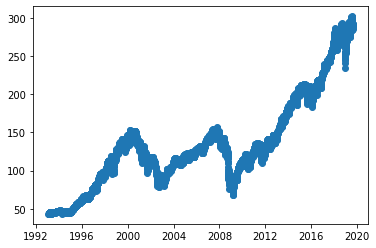

In [10]:
# Visualizing total dataset without volumne

plt.plot_date(spy['Date'], spy['Close'])

# Choose your target. Which column in your tabular dataset will you predict?


In [11]:
#  PRICE(CLOSE) NEXT DAY ABOVE/BELOW PREVIOUS DAY BASED ON ROLLING MEAN(SMA) OR RELATIVE STRENGTH (RSI)***

# Choose which observations you will use to train, validate, and test your model. And which observations, if any, to exclude.


In [12]:
#*WILL USE ALL SPY (S&P 500 ETF) DATA*

# Determine whether your problem is regression or classification.


In [13]:
# *CLASSIFICATION (IS THIS TICKER OVER/UNDER THE X_DAY ROLLING MEAN ***AND*** ALSO OVER/UNDER BOUGHT ON THE RSI?)*
# *AKA 3 WAY CONFUSION MATRIX WITH UNDER TO BOTH AS THE HIGHEST LIKELIHOOD PREDICTOR OF NEXT DAY/WEEKS/MONTHS POSITIVE RETURNS*

# Choose your evaluation metric.

In [14]:
# WILL USE ACCURACY SCORE

# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [15]:
spy.head()

,Date,Close,Volume
0,1993-01-29,43.93750,1003200
1,1993-02-01,44.25000,480500
2,1993-02-02,44.34375,201300
3,1993-02-03,44.81250,529400
4,1993-02-04,45.00000,531500


In [16]:
spy.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
dtype: object

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Year'] = spy['Date'].dt.year

In [19]:
spy.head()

,Date,Close,Volume,Year
0,1993-01-29,43.93750,1003200,1993
1,1993-02-01,44.25000,480500,1993
2,1993-02-02,44.34375,201300,1993
3,1993-02-03,44.81250,529400,1993
4,1993-02-04,45.00000,531500,1993


In [20]:
spy.dtypes

Date      datetime64[ns]
Close            float64
Volume             int64
Year               int64
dtype: object

### *NEITHER .ROLLING_MEAN NOR .ROLLING WORK*

In [21]:
# spy['SMA'] = spy['Close'].rolling(window = 14, min_periods = 14, axis = 0)

In [22]:
# spy['SMA'] = pd.rolling_mean(spy['Close'], min_periods = 14, window = 14)

In [23]:
spy.isnull().sum()

Date      0
Close     0
Volume    0
Year      0
dtype: int64

In [24]:
spy.head()

,Date,Close,Volume,Year
0,1993-01-29,43.93750,1003200,1993
1,1993-02-01,44.25000,480500,1993
2,1993-02-02,44.34375,201300,1993
3,1993-02-03,44.81250,529400,1993
4,1993-02-04,45.00000,531500,1993


In [25]:
spy.head()

,Date,Close,Volume,Year
0,1993-01-29,43.93750,1003200,1993
1,1993-02-01,44.25000,480500,1993
2,1993-02-02,44.34375,201300,1993
3,1993-02-03,44.81250,529400,1993
4,1993-02-04,45.00000,531500,1993


# Begin with baselines: majority class baseline for classification, or mean baseline for regression, with your metric of choice.


In [26]:
spy['SMA'] = spy.Close.rolling(window=14).mean()
spy['SMA_Yesterday'] = spy['SMA'].shift(1)

In [27]:
spy.head(15)

,Date,Close,Volume,Year,SMA,SMA_Yesterday
0,1993-01-29,43.93750,1003200,1993,NaN,NaN
1,1993-02-01,44.25000,480500,1993,NaN,NaN
2,1993-02-02,44.34375,201300,1993,NaN,NaN
3,1993-02-03,44.81250,529400,1993,NaN,NaN
4,1993-02-04,45.00000,531500,1993,NaN,NaN
5,1993-02-05,44.96875,492100,1993,NaN,NaN
6,1993-02-08,44.96875,596100,1993,NaN,NaN
7,1993-02-09,44.65625,122100,1993,NaN,NaN
8,1993-02-10,44.71875,379600,1993,NaN,NaN
9,1993-02-11,44.93750,19500,1993,NaN,NaN


In [28]:
spy.tail()

,Date,Close,Volume,Year,SMA,SMA_Yesterday
6687,2019-08-20,290.089996,51596400,2019,289.480711,290.004996
6688,2019-08-21,292.450012,49524700,2019,289.309997,289.480711
6689,2019-08-22,292.359985,51666400,2019,289.291425,289.309997
6690,2019-08-23,284.850006,149161500,2019,289.364997,289.291425
6691,2019-08-26,288.000000,72423800,2019,289.379283,289.364997


In [29]:
spy.isna().sum()

Date              0
Close             0
Volume            0
Year              0
SMA              13
SMA_Yesterday    14
dtype: int64

In [30]:
spy.dtypes

Date             datetime64[ns]
Close                   float64
Volume                    int64
Year                      int64
SMA                     float64
SMA_Yesterday           float64
dtype: object

In [31]:
# spy['Close_Higher'] = np.where(spy['Close'] > spy['Close'].shift(-1), 'True','False')

In [32]:
# spy_numeric = ['Close']

In [33]:
spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)<spy['Close'].shift(1), 0,1)

In [34]:
spy['Below_14D_SMA_Yesterday'] = np.where(spy['SMA'].shift(1)>spy['Close'].shift(1), 0,1)

In [35]:
# spy['Above_14D_SMA_Yesterday'] = np.where(spy['SMA']>spy['Close'], 'True','False')

In [36]:
spy.Above_14D_SMA_Yesterday.value_counts(normalize=True)

0    0.605649
1    0.394351
Name: Above_14D_SMA_Yesterday, dtype: float64

In [37]:
spy_numeric_diff = spy[['Close']].diff()[1:]
# cond1 = spy_numeric_diff[['Close']] >=0
spy['Close_Higher_Than_Yesterday'] = np.insert(np.where(spy_numeric_diff[['Close']] >=0, '1','0'), 0, np.nan)

In [38]:
spy.Close_Higher_Than_Yesterday.value_counts(normalize=True)

1    0.541393
0    0.458458
n    0.000149
Name: Close_Higher_Than_Yesterday, dtype: float64

In [39]:
y_train = spy['Close_Higher_Than_Yesterday']

In [40]:
majority_class = y_train.mode()[0]

In [41]:
y_pred = [majority_class]*len(y_train)

In [42]:
from sklearn.metrics import accuracy_score
print('MAJORITY CLASS Validation Accuracy',accuracy_score(y_train, y_pred))

MAJORITY CLASS Validation Accuracy 0.5413927077106994


# Begin to clean and explore your data.

In [43]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

# Plot the distribution of your target.
### Regression problem: Is your target skewed? Then, log-transform it.
### Classification: Are your classes imbalanced? Then, don't use just accuracy. And try class_balance parameter in scikit-learn.


 

In [44]:
spy.tail(25)

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday
6667,2019-07-23,300.029999,44564500,2019,298.717139,298.459996,1,0,1
6668,2019-07-24,301.440002,47213200,2019,298.905712,298.717139,0,1,1
6669,2019-07-25,300.000000,55394100,2019,299.015712,298.905712,0,1,0
6670,2019-07-26,302.010010,45084100,2019,299.386427,299.015712,0,1,1
6671,2019-07-29,301.459991,38126500,2019,299.691426,299.386427,0,1,0
6672,2019-07-30,300.720001,45849000,2019,299.842141,299.691426,0,1,0
6673,2019-07-31,297.429993,104245200,2019,299.707855,299.842141,0,1,0
6674,2019-08-01,294.839996,142646600,2019,299.292855,299.707855,1,0,0
6675,2019-08-02,292.619995,116749700,2019,298.712141,299.292855,1,0,0
6676,2019-08-05,283.820007,178745400,2019,297.572141,298.712141,1,0,0


In [45]:
spy_1994_2013 = pd.concat([spy_1994,spy_1995,spy_1996,spy_1997,spy_1998,
                           spy_1999,spy_2000,spy_2001,spy_2002,spy_2003,
                           spy_2004,spy_2005,spy_2006,spy_2007,spy_2008,
                           spy_2009,spy_2010,spy_2011,spy_2012,spy_2013])
spy_1994_2013.describe()

,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
count,5036.000000,5.036000e+03,5036.000000,5036.000000,5036.000000,5036.000000,5036.000000
mean,111.468242,8.429327e+07,2003.494043,111.292774,111.266038,0.402701,0.597299
std,30.940716,1.084023e+08,5.768917,30.865436,30.863032,0.490490,0.490490
min,43.906250,5.200000e+03,1994.000000,44.590402,44.590402,0.000000,0.000000
25%,92.554688,5.681350e+06,1998.000000,92.436674,92.421875,0.000000,0.000000
50%,116.040001,4.162765e+07,2003.000000,115.814286,115.804286,0.000000,1.000000
75%,133.587502,1.331848e+08,2008.000000,133.438749,133.437768,1.000000,1.000000
max,184.690002,8.710263e+08,2013.000000,181.375715,181.094286,1.000000,1.000000


In [46]:
target = ['Close_Higher_Than_Yesterday']
drop = ['Date','Year']


train = spy_1994_2013.drop(columns=drop)
test = spy_2017.drop(columns=drop)
val = spy_2016.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [47]:
X_test.head()

,Close,Volume,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday
6026,225.240005,91366500,225.576429,225.648572,1,0
6027,226.580002,78744400,225.492144,225.576429,1,0
6028,226.399994,78379000,225.529286,225.492144,0,1
6029,227.210007,71559900,225.557858,225.529286,0,1
6030,226.460007,46939700,225.659288,225.557858,0,1


In [48]:
train.head()

,Close,Volume,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday
234,46.46875,960900,46.703125,46.732143,1,0,0
235,46.65625,164300,46.712054,46.703125,1,0,1
236,46.75000,710900,46.732143,46.712054,1,0,1
237,46.75000,201000,46.741071,46.732143,0,1,1
238,47.03125,775500,46.774554,46.741071,0,1,1


In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [50]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

C:\Users\Sarmen\Anaconda3\lib\site-packages\sklearn\pipeline.py:267: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Validation Accuracy 0.5238095238095238


In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

y_pred = pipeline.predict(X_val)

confusion_matrix(y_val, y_pred)

array([[38, 77],
       [43, 94]], dtype=int64)

In [52]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    return columns, index

plot_confusion_matrix(y_val, y_pred)

(['Predicted 0', 'Predicted 1'], ['Actual 0', 'Actual 1'])

In [53]:
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return table

plot_confusion_matrix(y_val, y_pred)

,Predicted 0,Predicted 1
Actual 0,38,77
Actual 1,43,94


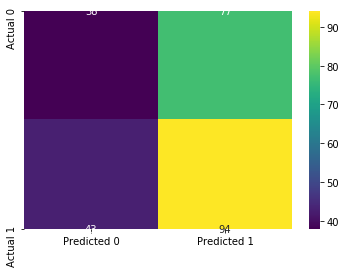

In [54]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred),
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.33      0.39       115
           1       0.55      0.69      0.61       137

   micro avg       0.52      0.52      0.52       252
   macro avg       0.51      0.51      0.50       252
weighted avg       0.51      0.52      0.51       252



# Continue to clean and explore your data. Make exploratory visualizations.

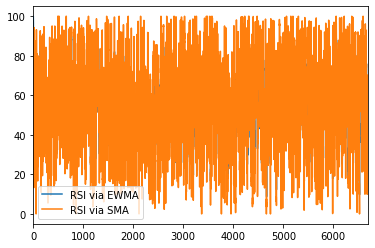

In [56]:
import pandas as pd

Close = spy['Close']

# Get the difference in price from previous step

delta = Close.diff()

# Get rid of the first row, which is NaN since it did not have a previous 
# row to calculate the differences
delta = delta[1:] 

# Make the positive gains (up) and negative gains (down) Series
up, down = delta.copy(), delta.copy()
up[up < 0] = 0
down[down > 0] = 0

# # Calculate the EWMA

spy['Roll_Up'] = up.shift(1)
spy['Roll_Down'] = down.abs().shift(1)

spy['Roll_Up1'] = spy['Roll_Up'].ewm(com=7).mean()
spy['Roll_Down1'] = spy['Roll_Down'].ewm(com=7).mean()

# # Calculate the RSI based on EWMA

RS1 = spy['Roll_Up1'] / spy['Roll_Down1']
RSI1 = 100.0 - (100.0 / (1.0 + RS1))

spy['RSI_Yesterday_EXP'] = RSI1

# Calculate the SMA
spy['Roll_Up2'] = spy['Roll_Up'].rolling(window = 7).mean()
spy['Roll_Down2'] = spy['Roll_Down'].rolling(window = 7).mean()

# Calculate the RSI based on SMA
RS2 = spy['Roll_Up2'] / spy['Roll_Down2']
RSI2 = 100.0 - (100.0 / (1.0 + RS2))

spy['RSI_Yesterday_SMA'] = RSI2

# Compare graphically
plt.figure()
RSI1.plot()
RSI2.plot()
plt.legend(['RSI via EWMA', 'RSI via SMA'])
plt.show()

In [57]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [58]:
spy.head(20)

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA
0,1993-01-29,43.93750,1003200,1993,NaN,NaN,1,1,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-02-01,44.25000,480500,1993,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-02-02,44.34375,201300,1993,NaN,NaN,1,1,1,0.31250,0.00000,0.312500,0.000000,100.000000,NaN,NaN,NaN
3,1993-02-03,44.81250,529400,1993,NaN,NaN,1,1,1,0.09375,0.00000,0.195833,0.000000,100.000000,NaN,NaN,NaN
4,1993-02-04,45.00000,531500,1993,NaN,NaN,1,1,1,0.46875,0.00000,0.299186,0.000000,100.000000,NaN,NaN,NaN
5,1993-02-05,44.96875,492100,1993,NaN,NaN,1,1,0,0.18750,0.00000,0.265450,0.000000,100.000000,NaN,NaN,NaN
6,1993-02-08,44.96875,596100,1993,NaN,NaN,1,1,1,0.00000,0.03125,0.197329,0.008020,96.094659,NaN,NaN,NaN
7,1993-02-09,44.65625,122100,1993,NaN,NaN,1,1,0,0.00000,0.00000,0.152579,0.006201,96.094659,NaN,NaN,NaN
8,1993-02-10,44.71875,379600,1993,NaN,NaN,1,1,1,0.00000,0.31250,0.121174,0.069246,63.635248,0.151786,0.049107,75.555556
9,1993-02-11,44.93750,19500,1993,NaN,NaN,1,1,1,0.06250,0.00000,0.110001,0.056059,66.241668,0.116071,0.049107,70.270270


In [59]:
spy.tail()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA
6687,2019-08-20,290.089996,51596400,2019,289.480711,290.004996,0,1,0,3.479981,0.000000,1.839242,1.636148,52.921890,1.844282,2.028569,47.620786
6688,2019-08-21,292.450012,49524700,2019,289.309997,289.480711,0,1,1,0.000000,2.239991,1.609336,1.711628,48.459912,1.844282,2.062853,47.202921
6689,2019-08-22,292.359985,51666400,2019,289.291425,289.309997,0,1,0,2.360016,0.000000,1.703171,1.497674,53.210041,2.181427,1.555712,58.371577
6690,2019-08-23,284.850006,149161500,2019,289.364997,289.291425,0,1,0,0.000000,0.090027,1.490275,1.321719,52.997099,1.541430,1.568573,49.563613
6691,2019-08-26,288.000000,72423800,2019,289.379283,289.364997,1,0,1,0.000000,7.509979,1.303991,2.095251,38.361220,1.541430,1.405714,52.302501


In [60]:
spy['Overbought_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) > 70.0
spy['Oversold_Yesterday_EXP'] = spy['RSI_Yesterday_EXP'].shift(1) < 30.0

spy['Overbought_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) > 70.0
spy['Oversold_Yesterday_SMA'] = spy['RSI_Yesterday_SMA'].shift(1) < 30.0

In [61]:
spy['Overbought_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_EXP'].replace(to_replace=False,value=0, inplace=True)

spy['Overbought_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_Yesterday_SMA'].replace(to_replace=False,value=0, inplace=True)

In [62]:
spy.head()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA
0,1993-01-29,43.93750,1003200,1993,NaN,NaN,1,1,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,1993-02-01,44.25000,480500,1993,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,1993-02-02,44.34375,201300,1993,NaN,NaN,1,1,1,0.31250,0.0,0.312500,0.0,100.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,1993-02-03,44.81250,529400,1993,NaN,NaN,1,1,1,0.09375,0.0,0.195833,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0
4,1993-02-04,45.00000,531500,1993,NaN,NaN,1,1,1,0.46875,0.0,0.299186,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0


In [63]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_EXP'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'] = ((spy['Oversold_Yesterday_SMA'] ==1) & (spy['Below_14D_SMA_Yesterday'] == 0))

In [64]:
spy['Oversold_EXP_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)
spy['Oversold_SMA_And_Under_14D_SMA_Yesterday'].replace(to_replace=False,value=0, inplace=True)

In [65]:
spy.head()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday
0,1993-01-29,43.93750,1003200,1993,NaN,NaN,1,1,n,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,1993-02-01,44.25000,480500,1993,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,1993-02-02,44.34375,201300,1993,NaN,NaN,1,1,1,0.31250,0.0,0.312500,0.0,100.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,1993-02-03,44.81250,529400,1993,NaN,NaN,1,1,1,0.09375,0.0,0.195833,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0
4,1993-02-04,45.00000,531500,1993,NaN,NaN,1,1,1,0.46875,0.0,0.299186,0.0,100.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0


In [66]:
spy.Oversold_EXP_And_Under_14D_SMA_Yesterday.value_counts()

0.0    6300
1.0     392
Name: Oversold_EXP_And_Under_14D_SMA_Yesterday, dtype: int64

In [67]:
spy.Oversold_SMA_And_Under_14D_SMA_Yesterday.value_counts()

0.0    5802
1.0     890
Name: Oversold_SMA_And_Under_14D_SMA_Yesterday, dtype: int64

In [68]:
spy['Volume_Yesterday'] = spy['Volume'].shift(1)

In [69]:
spy_2019 = spy[spy['Year'] == 2019]
spy_2018 = spy[spy['Year'] == 2018]
spy_2017 = spy[spy['Year'] == 2017]
spy_2016 = spy[spy['Year'] == 2016]
spy_2015 = spy[spy['Year'] == 2015]
spy_2014 = spy[spy['Year'] == 2014]
spy_2013 = spy[spy['Year'] == 2013]
spy_2012 = spy[spy['Year'] == 2012]
spy_2011 = spy[spy['Year'] == 2011]
spy_2010 = spy[spy['Year'] == 2010]
spy_2009 = spy[spy['Year'] == 2009]
spy_2008 = spy[spy['Year'] == 2008]
spy_2007 = spy[spy['Year'] == 2007]
spy_2006 = spy[spy['Year'] == 2006]
spy_2005 = spy[spy['Year'] == 2005]
spy_2004 = spy[spy['Year'] == 2004]
spy_2003 = spy[spy['Year'] == 2003]
spy_2002 = spy[spy['Year'] == 2002]
spy_2001 = spy[spy['Year'] == 2001]
spy_2000 = spy[spy['Year'] == 2000]
spy_1999 = spy[spy['Year'] == 1999]
spy_1998 = spy[spy['Year'] == 1998]
spy_1997 = spy[spy['Year'] == 1997]
spy_1996 = spy[spy['Year'] == 1996]
spy_1995 = spy[spy['Year'] == 1995]
spy_1994 = spy[spy['Year'] == 1994]
spy_1993 = spy[spy['Year'] == 1993]

In [70]:
spy_1994_2013 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2013)]
spy_1994_2017 = spy[(spy['Year'] >= 1994) & (spy['Year'] <=2017)]
spy_2014_2019 = spy[(spy['Year'] >=2014) & (spy['Year'] <=2019)]

In [71]:
spy_2010_2013 = pd.concat([spy_2010,spy_2011,spy_2012,spy_2013])
spy_2010_2013.head()

,Date,Close,Volume,Year,SMA,SMA_Yesterday,Above_14D_SMA_Yesterday,Below_14D_SMA_Yesterday,Close_Higher_Than_Yesterday,Roll_Up,Roll_Down,Roll_Up1,Roll_Down1,RSI_Yesterday_EXP,Roll_Up2,Roll_Down2,RSI_Yesterday_SMA,Overbought_Yesterday_EXP,Oversold_Yesterday_EXP,Overbought_Yesterday_SMA,Oversold_Yesterday_SMA,Oversold_EXP_And_Under_14D_SMA_Yesterday,Oversold_SMA_And_Under_14D_SMA_Yesterday,Volume_Yesterday
4264,2010-01-04,113.330002,118944600,2010,111.799286,111.640714,1,0,1,0.000000,1.079995,0.245757,0.270829,47.573280,0.198571,0.182857,52.059927,0.0,0.0,1.0,0.0,0.0,0.0,90637900.0
4265,2010-01-05,113.629997,111579900,2010,111.925000,111.799286,0,1,1,1.890000,0.000000,0.451287,0.236975,65.569046,0.411428,0.182857,69.230771,0.0,0.0,0.0,0.0,0.0,0.0,118944600.0
4266,2010-01-06,113.709999,116074400,2010,112.093571,111.925000,0,1,1,0.299995,0.000000,0.432376,0.207353,67.587305,0.422857,0.182857,69.811330,0.0,0.0,0.0,0.0,0.0,0.0,111579900.0
4267,2010-01-07,114.190002,131091100,2010,112.284286,112.093571,0,1,1,0.080002,0.000000,0.388329,0.181434,68.156200,0.358571,0.182857,66.226886,0.0,0.0,0.0,0.0,0.0,0.0,116074400.0
4268,2010-01-08,114.570000,126402800,2010,112.597857,112.284286,0,1,1,0.480003,0.000000,0.399788,0.158755,71.576956,0.392857,0.182857,68.238230,0.0,0.0,0.0,0.0,0.0,0.0,131091100.0


In [72]:
spy_2010_2013.columns

Index(['Date', 'Close', 'Volume', 'Year', 'SMA', 'SMA_Yesterday', 'Above_14D_SMA_Yesterday', 'Below_14D_SMA_Yesterday', 'Close_Higher_Than_Yesterday', 'Roll_Up', 'Roll_Down', 'Roll_Up1', 'Roll_Down1', 'RSI_Yesterday_EXP', 'Roll_Up2', 'Roll_Down2', 'RSI_Yesterday_SMA', 'Overbought_Yesterday_EXP', 'Oversold_Yesterday_EXP', 'Overbought_Yesterday_SMA', 'Oversold_Yesterday_SMA', 'Oversold_EXP_And_Under_14D_SMA_Yesterday', 'Oversold_SMA_And_Under_14D_SMA_Yesterday', 'Volume_Yesterday'], dtype='object')

In [73]:
# 2018 training data

# 0.0091 ± 0.0183	SMA_Yesterday
# 0.0061 ± 0.0000	Oversold_SMA_And_Under_14D_SMA_Yesterday
# 0.0061 ± 0.0000	Oversold_Yesterday_SMA
# 0 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	Oversold_Yesterday_EXP
# -0.0030 ± 0.0183	Overbought_Yesterday_SMA
# -0.0061 ± 0.0000	Above_14D_SMA_Yesterday
# -0.0091 ± 0.0183	Overbought_Yesterday_EXP
# -0.0091 ± 0.0427	RSI_Yesterday_SMA
# -0.0091 ± 0.0305	Below_14D_SMA_Yesterday
# -0.0122 ± 0.0488	Volume_Yesterday
# -0.0213 ± 0.0427	RSI_Yesterday_EXP

In [74]:
# 1994-2013 training data

# 0 ± 0.0000	Oversold_Yesterday_EXP
# 0 ± 0.0000	SMA_Yesterday
# 0 ± 0.0000	Year
# -0.0040 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# -0.0040 ± 0.0000	Overbought_Yesterday_EXP
# -0.0060 ± 0.0120	Oversold_SMA_And_Under_14D_SMA_Yesterday
# -0.0159 ± 0.0159	Overbought_Yesterday_SMA
# -0.0199 ± 0.0000	RSI_Yesterday_EXP
# -0.0219 ± 0.0120	Volume_Yesterday

In [75]:
# BELOW IS THE DROP FOR TRAIN 1994-2013 AND VAL 2019

# 0.0823 ± 0.0427	Overbought_Yesterday_SMA
# 0.0671 ± 0.0366	RSI_Yesterday_EXP
# 0.0549 ± 0.0122	RSI_Yesterday_SMA
# 0.0335 ± 0.0061	Above_14D_SMA_Yesterday
# 0.0305 ± 0.0000	Below_14D_SMA_Yesterday
# 0.0061 ± 0.0122	Overbought_Yesterday_EXP
# 0 ± 0.0000	Volume_Yesterday
# 0 ± 0.0000	Oversold_SMA_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	Oversold_Yesterday_EXP
# 0 ± 0.0000	SMA_Yesterday
# -0.0030 ± 0.0061	Oversold_Yesterday_SMA

# DROP BELOW AFTER TRAINING/VAL PERMUTATION IMPORTANCE

# 0.0030 ± 0.0305	Overbought_Yesterday_SMA
# 0.0030 ± 0.0061	Overbought_Yesterday_EXP
# -0.0030 ± 0.0061	Below_14D_SMA_Yesterday
# -0.0457 ± 0.0793	RSI_Yesterday_SMA

In [76]:
# 0.0183 ± 0.0122	Overbought_Yesterday_SMAx
# 0.0091 ± 0.0061	Below_14D_SMA_Yesterday
# 0.0061 ± 0.0000	Oversold_SMA_And_Under_14D_SMA_Yesterday
# 0.0061 ± 0.0122	Overbought_Yesterday_EXP
# 0 ± 0.0000	Oversold_EXP_And_Under_14D_SMA_Yesterday
# 0 ± 0.0000	SMA_Yesterday
# 0 ± 0.0000	Year
# -0.0061 ± 0.0000	Oversold_Yesterday_SMA
# -0.0061 ± 0.0122	Above_14D_SMA_Yesterday
# -0.0091 ± 0.0061	Oversold_Yesterday_EXP
# -0.0091 ± 0.0427	RSI_Yesterday_EXP
# -0.0122 ± 0.0000	Volume_Yesterday
# -0.0274 ± 0.0305	RSI_Yesterday_SMAx

In [77]:
target = 'Close_Higher_Than_Yesterday'
# drop = ['Date','Year','SMA','Volume','Adj_Close','Roll_Up','Roll_Down','Oversold_And_Under_14D_SMA_Yesterday']
# drop = ['Date','Year','SMA','Volume','Adj_Close','Roll_Up','Roll_Down', 'Above_14D_SMA_Yesterday',
#         'Overbought_Yesterday','RSI']

# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','RSI_Yesterday_SMA','Oversold_Yesterday_EXP','SMA_Yesterday',
#         'Year','Oversold_EXP_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP',
#         'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_SMA','RSI_Yesterday_EXP',
#         'Volume_Yesterday']


# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','RSI_Yesterday_EXP','Volume_Yesterday','Below_14D_SMA_Yesterday',
#         'Year','RSI_Yesterday_SMA','Overbought_Yesterday_EXP','Above_14D_SMA_Yesterday',
#         'Overbought_Yesterday_SMA'
#         ]

# BELOW ARE STANDARD DROPS (SOME CONTAIN FUTURE LEAKAGE)

# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2']

# BELOW IS THE DROP FOR TRAIN 1994-2013 AND VAL 2019

#1
# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','Year','Volume_Yesterday','Oversold_SMA_And_Under_14D_SMA_Yesterday',
#         'Oversold_EXP_And_Under_14D_SMA_Yesterday','Oversold_Yesterday_EXP','SMA_Yesterday',
#         'Oversold_Yesterday_SMA','Overbought_Yesterday_SMA','Overbought_Yesterday_EXP',
#         'Below_14D_SMA_Yesterday','RSI_Yesterday_SMA']

#2
# drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
#         'Close','Roll_Down2','Overbought_Yesterday_EXP','Oversold_Yesterday_SMA',
#         'Year','SMA_Yesterday','RSI_Yesterday_SMA','Oversold_EXP_And_Under_14D_SMA_Yesterday',
#         'Oversold_SMA_And_Under_14D_SMA_Yesterday','Oversold_Yesterday_EXP','RSI_Yesterday_EXP',
#         'Above_14D_SMA_Yesterday']

#3
drop = ['Date','Volume','SMA','Roll_Up','Roll_Up1','Roll_Up2','Roll_Down','Roll_Down1',
        'Close','Roll_Down2','RSI_Yesterday_SMA','Overbought_Yesterday_SMA','Volume_Yesterday',
        'Oversold_EXP_And_Under_14D_SMA_Yesterday','Year','SMA_Yesterday','Below_14D_SMA_Yesterday',
        'Oversold_SMA_And_Under_14D_SMA_Yesterday','Overbought_Yesterday_EXP','Oversold_Yesterday_EXP',
        'Oversold_Yesterday_SMA','Above_14D_SMA_Yesterday']

train = spy_1994_2013.drop(columns=drop)
test = spy_2015.drop(columns=drop)
val = spy_2016.drop(columns=drop)

X_val = val.drop(columns=target)
y_val = val[target]

X_test = test.drop(columns=target)
y_test = test[target]

X_train = train.drop(columns=target)
y_train = train[target]

In [78]:
y_val.value_counts()

1    137
0    115
Name: Close_Higher_Than_Yesterday, dtype: int64

In [79]:
y_train.value_counts()

1    2723
0    2313
Name: Close_Higher_Than_Yesterday, dtype: int64

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

In [81]:
pipeline = make_pipeline(
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.4642857142857143


In [82]:
y_val.describe()

count     252
unique      2
top         1
freq      137
Name: Close_Higher_Than_Yesterday, dtype: object

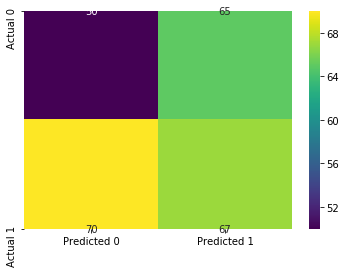

In [83]:
y_pred=pipeline.predict(X_val)

plot_confusion_matrix(y_val,y_pred)

In [84]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.43      0.43       115
           1       0.51      0.49      0.50       137

   micro avg       0.46      0.46      0.46       252
   macro avg       0.46      0.46      0.46       252
weighted avg       0.47      0.46      0.47       252



# Fit a model. Does it beat your baseline?

### ROC AUC (GIVING GENERIC VALUES OF .5 ...)

In [85]:
# from sklearn.metrics import roc_auc_score

# y_pred_proba = np.full_like(y_val, fill_value=1.00)
# roc_auc_score(y_val, y_pred_proba)

# y_pred_proba = np.full_like(y_val, fill_value=0)
# roc_auc_score(y_val, y_pred_proba)

# y_pred_proba = np.full_like(y_val, fill_value=0.50)
# roc_auc_score(y_val, y_pred_proba)

# BELOW THROWS ERROR:
# UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless

In [86]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_val=='Charged Off', y_pred_proba)
# plt.plot(fpr, tpr)
# plt.title('ROC curve')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate');

In [87]:
y_val.value_counts()

1    137
0    115
Name: Close_Higher_Than_Yesterday, dtype: int64

In [88]:
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

lr = make_pipeline(
    ce.OrdinalEncoder(), # Not ideal for Linear Regression 
    StandardScaler(), 
    LinearRegression()
)

lr.fit(X_train, y_train)
print('Linear Regression R^2', lr.score(X_val, y_val))

Linear Regression R^2 0.0027457364259479977


In [89]:
X_val.columns

Index(['RSI_Yesterday_EXP'], dtype='object')

In [90]:
X_val.RSI_Yesterday_EXP.value_counts()

62.745717    2
31.410669    1
45.723886    1
39.374979    1
35.092831    1
38.792726    1
45.551664    1
54.894257    1
62.470404    1
72.838419    1
36.773100    1
44.705666    1
75.225075    1
64.342078    1
63.914692    1
85.247144    1
50.522359    1
47.993778    1
60.635357    1
56.140965    1
41.032526    1
58.532494    1
58.674894    1
60.550206    1
50.765592    1
41.575439    1
27.008096    1
60.554981    1
66.339664    1
74.315514    1
32.915848    1
50.078931    1
50.556399    1
70.199518    1
67.371940    1
58.296774    1
73.427493    1
49.249101    1
33.928152    1
35.453592    1
68.238569    1
45.080263    1
34.378292    1
80.382881    1
55.394837    1
62.238794    1
48.244289    1
38.247442    1
54.416745    1
60.320906    1
76.783723    1
24.846950    1
57.397762    1
28.553871    1
46.204516    1
69.034388    1
47.885668    1
63.045167    1
61.100745    1
70.389886    1
60.837522    1
77.186716    1
69.857517    1
72.812977    1
50.373786    1
66.180991    1
60.311343 

In [91]:
X_val_example = X_val[X_val['RSI_Yesterday_EXP'] <= 30]
X_val_example

,RSI_Yesterday_EXP
5778,23.339339
5779,20.547478
5780,21.504718
5781,29.431349
5782,21.646641
5784,27.573094
5785,28.553871
5786,24.846950
5787,29.369188
5802,28.296221


In [92]:
example = X_val_example.iloc[[0]]
example

,RSI_Yesterday_EXP
5778,23.339339


In [93]:
pred = lr.predict(example)[0]
print(f'Predicted Probability Close Higher Today: {pred:.2f}')

Predicted Probability Close Higher Today: 0.58


In [94]:
example2 = X_val_example.iloc[[1]]
pred2 = lr.predict(example2)[0]
print(f'Predicted Probability Close Higher Today: {pred2:.2f}')

Predicted Probability Close Higher Today: 0.59


In [95]:
example2

,RSI_Yesterday_EXP
5779,20.547478


In [96]:
example3 = X_val.iloc[[4]]
pred3 = lr.predict(example3)[0]
print(f'Predicted Probability Close Higher Today: {pred3:.2f}')

Predicted Probability Close Higher Today: 0.58


In [97]:
example3

,RSI_Yesterday_EXP
5778,23.339339


In [98]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [99]:
# conda install -c conda-forge category_encoders
# pip install category_encoders
# pip install plotly==4.1.0
# conda install -c conda-forge eli5 

import eli5
from eli5.sklearn import PermutationImportance

model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

permuter = PermutationImportance(
    model, scoring='accuracy', n_iter=2, random_state=42
)

permuter.fit(X_val, y_val)
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter,
    top=None,
    feature_names = feature_names
)

Weight,Feature
-0.0437 ± 0.0079,RSI_Yesterday_EXP


# DO XGBOOST IN COLAB

In [100]:
# !conda install -c mndrake xgboost

In [101]:
# from sklearn.metrics import r2_score
# from xgboost import XGBRegressor

# gb = make_pipeline(
#     ce.OrdinalEncoder(), 
#     XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
# )

# gb.fit(X_train, y_train_log)
# y_pred_log = gb.predict(X_val)
# y_pred = np.expm1(y_pred_log)
# print('Gradient Boosting R^2', r2_score(y_val, y_pred))

In [102]:
# pip install pdpbox

In [103]:
# from pdpbox.pdp import pdp_isolate, pdp_plot

# feature = 'Close'

# isolated = pdp_isolate(
#     model=gb, 
#     dataset=X_val, 
#     model_features=X_val.columns, 
#     feature=feature
# )

# pdp_plot(isolated, feature_name=feature);

In [104]:
# spy.iloc[[2]].to_string()

In [105]:
# spy.iloc[[2]]

In [106]:
X_val

,RSI_Yesterday_EXP
5774,44.793624
5775,36.773100
5776,38.279836
5777,31.808078
5778,23.339339
5779,20.547478
5780,21.504718
5781,29.431349
5782,21.646641
5783,34.378292


In [107]:
spy_close_higher = spy['Close_Higher_Than_Yesterday']
spy_close_higher

0       n
1       1
2       1
3       1
4       1
5       0
6       1
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      1
15      1
16      0
17      1
18      1
19      1
20      0
21      1
22      1
23      0
24      0
25      1
26      0
27      1
28      0
29      0
30      1
31      1
32      0
33      1
34      0
35      0
36      1
37      1
38      1
39      0
40      1
41      1
42      0
43      0
44      0
45      1
46      0
47      1
48      0
49      1
50      1
51      0
52      1
53      1
54      0
55      0
56      0
57      0
58      0
59      0
60      1
61      0
62      1
63      1
64      1
65      1
66      1
67      0
68      0
69      1
70      1
71      0
72      0
73      0
74      1
75      0
76      1
77      1
78      0
79      1
80      1
81      1
82      0
83      0
84      1
85      0
86      0
87      0
88      0
89      0
90      1
91      1
92      1
93      0
94      0
95      1
96      1
97      0
98      1
99      1


In [108]:
y_pred=pipeline.predict(X_val)
y_pred

array(['1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0',
       '1', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0',
       '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0',
       '1', '0', '1', '0', '0', '0', '0', '1', '1', '0', '1', '0', '0',
       '0', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1',
       '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0',
       '0', '1', '0', '1', '0', '0', '1', '0', '0', '0', '0', '1', '0',
       '0', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0',
       '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0',
       '0', '0', '1', '1', '1', '1', '0', '0', '0', '1', '0', '0', '0',
       '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '0', '1', '1',
       '1', '0', '0', '0', '1', '1', '1', '0', '0', '0', '1', '1

In [109]:
s = pd.Series(y_pred) 
s

0      1
1      1
2      0
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     0
11     1
12     0
13     1
14     1
15     0
16     0
17     0
18     0
19     0
20     1
21     1
22     1
23     1
24     0
25     0
26     1
27     0
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     0
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     0
44     0
45     0
46     1
47     1
48     0
49     1
50     0
51     0
52     0
53     0
54     1
55     1
56     1
57     1
58     0
59     1
60     1
61     1
62     1
63     0
64     0
65     1
66     0
67     0
68     0
69     1
70     0
71     1
72     0
73     0
74     1
75     1
76     1
77     1
78     0
79     1
80     1
81     0
82     0
83     1
84     0
85     1
86     0
87     1
88     1
89     0
90     0
91     0
92     1
93     0
94     1
95     0
96     0
97     1
98     0
99     0
100    0
101    0
102    1
103    0
104    0
105    1
106    1
107    0
108    1
109    0
110    0
1

In [110]:
preds = s.to_frame(name='Predictions')
preds

,Predictions
0,1
1,1
2,0
3,1
4,1
5,1
6,1
7,0
8,1
9,0


In [111]:
actual_and_preds = pd.concat([spy_close_higher,preds], axis=1)
actual_and_preds.head()

,Close_Higher_Than_Yesterday,Predictions
0,n,1
1,1,1
2,1,0
3,1,1
4,1,1


In [112]:
# actual_and_preds.

In [113]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions
0,n,1
1,1,1
2,1,0
3,1,1
4,1,1
5,0,1
6,1,1
7,0,0
8,1,1
9,1,0


In [114]:
actual_and_preds = actual_and_preds.drop(actual_and_preds.index[0])

In [115]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions
1,1,1
2,1,0
3,1,1
4,1,1
5,0,1
6,1,1
7,0,0
8,1,1
9,1,0
10,0,0


In [116]:
actual_and_preds['Close_Higher_Than_Yesterday'] = (actual_and_preds['Close_Higher_Than_Yesterday']).astype(int)

In [117]:
actual_and_preds.dropna(axis=0, inplace=True)

In [118]:
actual_and_preds['Predictions'] = (actual_and_preds['Predictions']).astype(int)

In [119]:
actual_and_preds.tail()

,Close_Higher_Than_Yesterday,Predictions
247,1,0
248,0,1
249,0,1
250,1,0
251,1,1


In [120]:
actual_and_preds['pred_yes_was_yes'] = (
    (actual_and_preds['Close_Higher_Than_Yesterday']==1) & (actual_and_preds['Predictions']==1)
)

actual_and_preds['pred_yes_was_no'] = (
    (actual_and_preds['Predictions'] ==1) & (actual_and_preds['Close_Higher_Than_Yesterday']==0)
)

actual_and_preds['pred_no_was_yes'] = (
    (actual_and_preds['Close_Higher_Than_Yesterday']==1) & (actual_and_preds['Predictions']==0)
)

actual_and_preds['pred_no_was_no'] = (
    (actual_and_preds['Predictions'] ==0) & (actual_and_preds['Close_Higher_Than_Yesterday']==0)
)

In [121]:
actual_and_preds.shape

(251, 6)

In [122]:
actual_and_preds['pred_yes_was_yes'] = np.where(actual_and_preds['pred_yes_was_yes']==True, 1,0)
actual_and_preds['pred_yes_was_no'] = np.where(actual_and_preds['pred_yes_was_no']==True, 1,0)
actual_and_preds['pred_no_was_yes'] = np.where(actual_and_preds['pred_no_was_yes']==True, 1,0)
actual_and_preds['pred_no_was_no'] = np.where(actual_and_preds['pred_no_was_no']==True, 1,0)

In [123]:
actual_and_preds

,Close_Higher_Than_Yesterday,Predictions,pred_yes_was_yes,pred_yes_was_no,pred_no_was_yes,pred_no_was_no
1,1,1,1,0,0,0
2,1,0,0,0,1,0
3,1,1,1,0,0,0
4,1,1,1,0,0,0
5,0,1,0,1,0,0
6,1,1,1,0,0,0
7,0,0,0,0,0,1
8,1,1,1,0,0,0
9,1,0,0,0,1,0
10,0,0,0,0,0,1
